In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data =pd.read_csv('./Admission_Predict_Ver1.1.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [4]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
data.shape

(500, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
data.isnull().mean()*100

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [8]:
data.duplicated().sum()

0

In [9]:
data.drop(columns='Serial No.', inplace=True)

In [10]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [11]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
column=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Chance of Admit ']

#### Replacing Column

In [13]:
data=data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
        'Chance of Admit ', 'Research']].copy()

In [14]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Research
0,337,118,4,4.5,4.5,9.65,0.92,1
1,324,107,4,4.0,4.5,8.87,0.76,1
2,316,104,3,3.0,3.5,8.00,0.72,1
3,322,110,3,3.5,2.5,8.67,0.80,1
4,314,103,2,2.0,3.0,8.21,0.65,0
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,0.87,1
496,337,117,5,5.0,5.0,9.87,0.96,1
497,330,120,5,4.5,5.0,9.56,0.93,1
498,312,103,4,4.0,5.0,8.43,0.73,0


### Univariate Analysis

#### Histogram

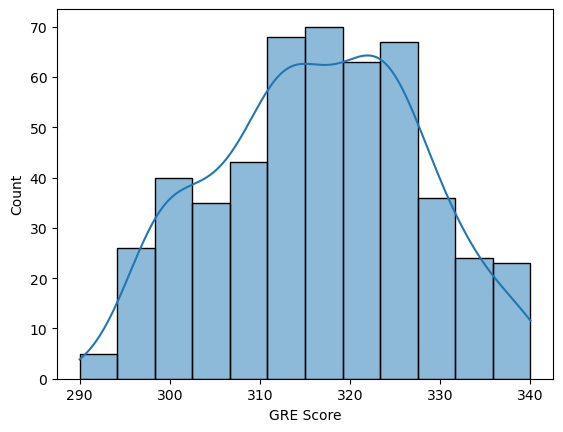

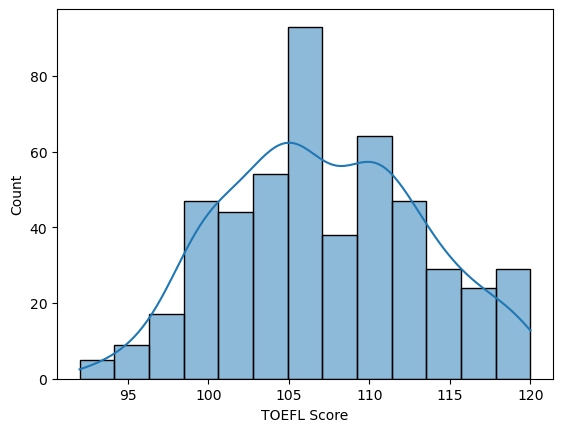

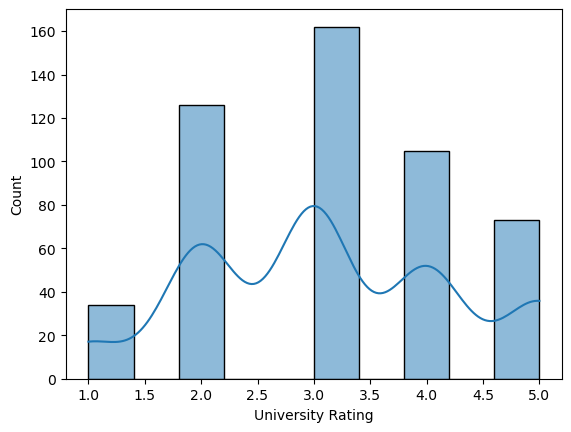

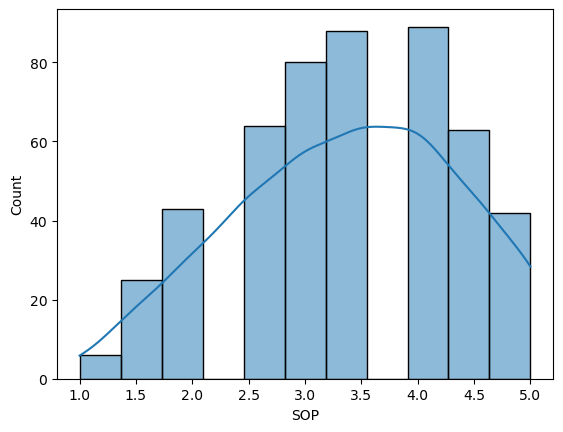

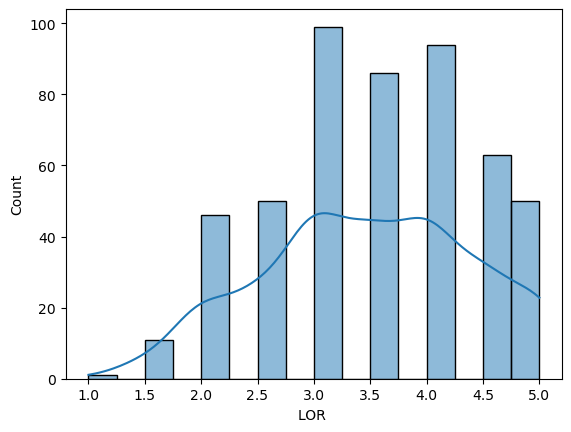

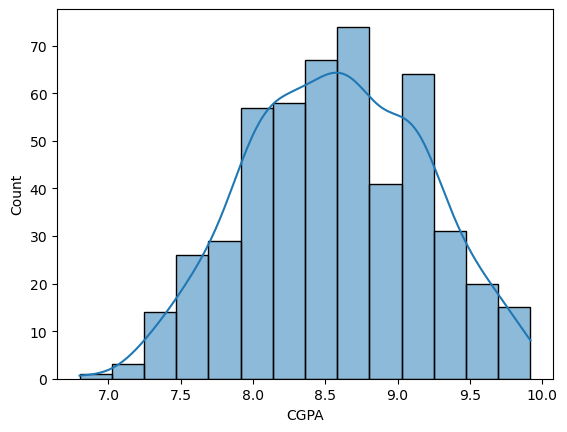

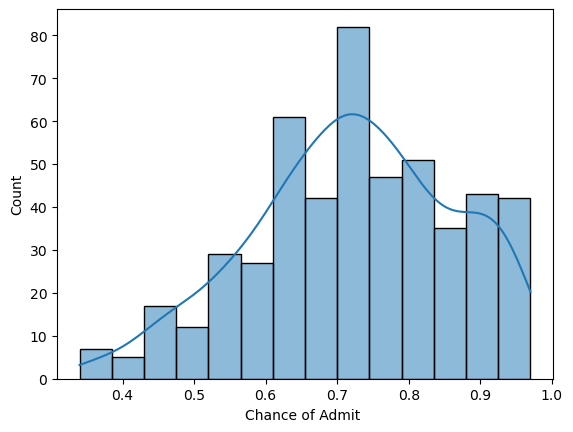

In [15]:
for i in column:
    sns.histplot(x=data[i], kde=True)
    plt.show()

#### Box plot

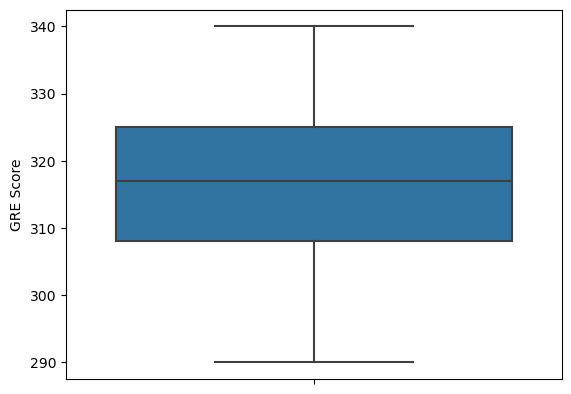

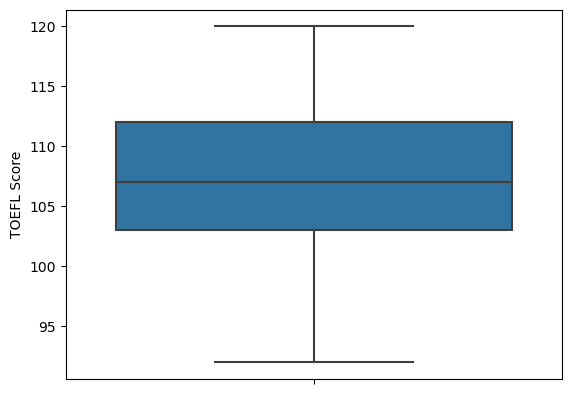

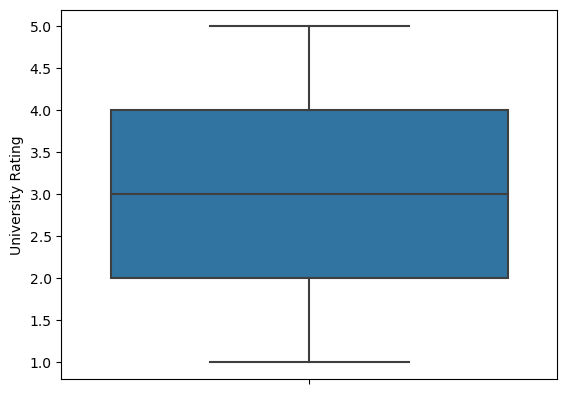

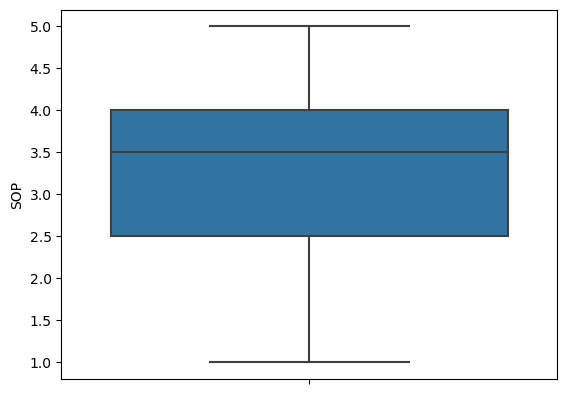

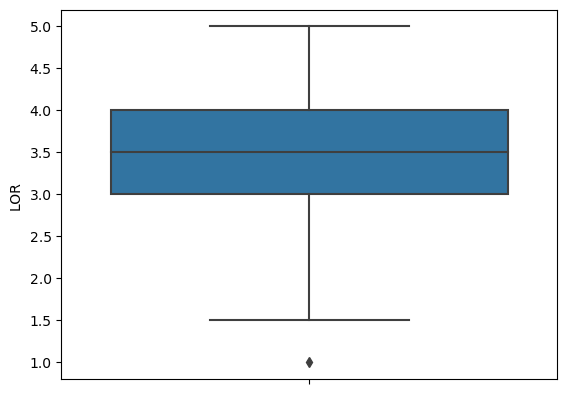

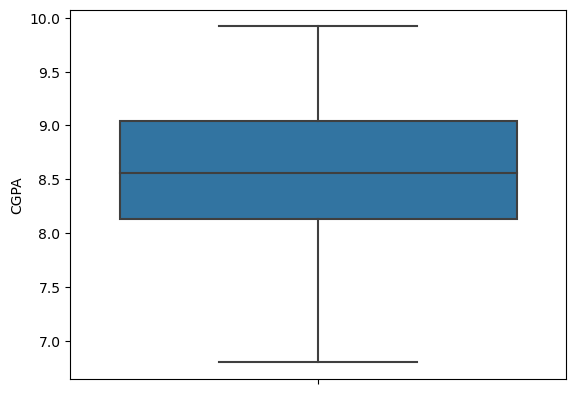

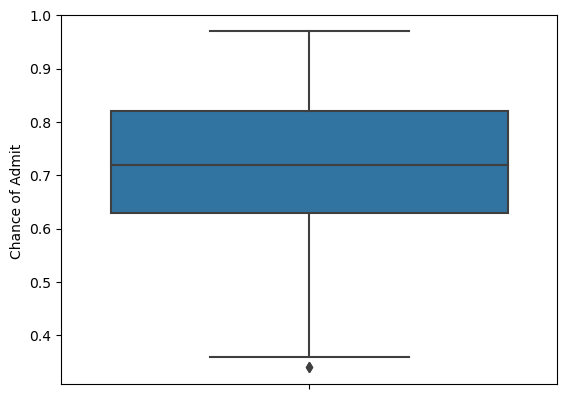

In [16]:
for i in column:
    sns.boxplot(y=data[i])
    plt.show()

#### Outlier treatment

#### setting the outlier limit

In [17]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [18]:
UL,LL = outlier_limit(data['LOR '])
data['LOR '] = np.where((data['LOR ']>UL) | (data['LOR ']<LL),np.nan,data['LOR '])

#### Checking the NaN values

In [19]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  1
CGPA                 0
Chance of Admit      0
Research             0
dtype: int64

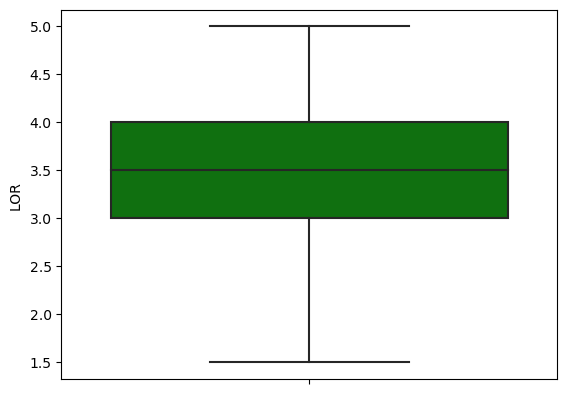

In [20]:
sns.boxplot(data=data, y='LOR ',color='green');

In [21]:
data.dropna(inplace=True)

### Multivariate Analysis

#### Scatter plot

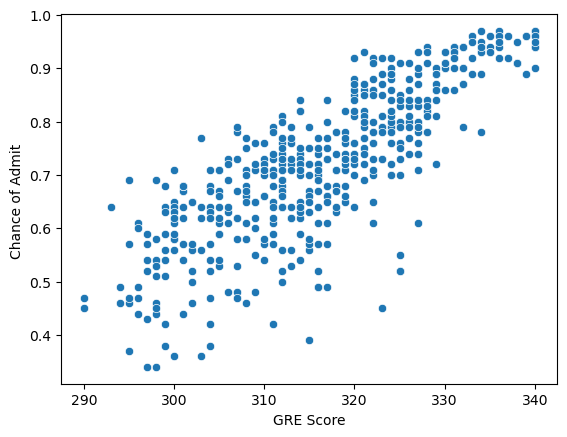

In [22]:
sns.scatterplot(data=data, x='GRE Score', y= 'Chance of Admit ')
plt.show()

#### Heat map

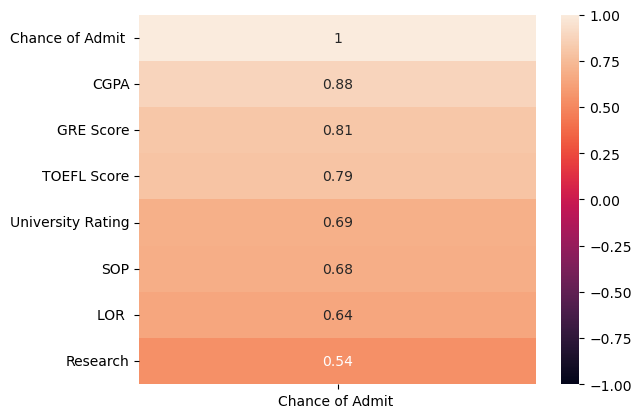

In [23]:
sns.heatmap(data.corr()[['Chance of Admit ']].sort_values(by='Chance of Admit ', ascending=False), vmin=-1, vmax=1, annot=True)
plt.show()

In [24]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Chance of Admit ', 'Research'],
      dtype='object')

In [25]:
to_drop = ['University Rating', 'SOP', 'LOR ', 'Research']

In [26]:
data2 = data.drop(columns=to_drop)
data2.head()

,GRE Score,TOEFL Score,CGPA,Chance of Admit
0,337,118,9.65,0.92
1,324,107,8.87,0.76
2,316,104,8.00,0.72
3,322,110,8.67,0.80
4,314,103,8.21,0.65


#### Selecting Features and Targets 

In [33]:
x = data2.iloc[:, :-1].values
y = data2.iloc[:, -1].values

### Feature Scaling

#### Initialising Standard Scaler

In [34]:
sc = StandardScaler()

In [35]:
x = sc.fit_transform(x)

#### Splitting the data into training and testing sets

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

### Model Building

#### Creating a dictionary of models for iterative purpose

In [37]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(random_state=0),
}    

#### Using a for loop for model training and testing

In [38]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("models trained with {}".format(name))
    training_score = model.score(x_train, y_train)*100
    testing_score = model.score(x_test, y_test)*100
    score = r2_score(y_test, model.predict(x_test))*100
    mae = mean_absolute_error(y_test, model.predict(x_test))
    mse = mean_squared_error(y_test, model.predict(x_test))
    rmse = np.sqrt(mse)
    print("r2score: ",score)
    print("training_score: ", training_score)
    print("testing_score: ", testing_score)
    print("mae: ", mae)
    print("mse: ", mse)
    print("rmse_test: ", rmse)
    print("*"*100)

models trained with LinearRegression
r2score:  75.78894332880542
training_score:  81.19416429650366
testing_score:  75.78894332880542
mae:  0.04918925600976402
mse:  0.004211685206456662
rmse_test:  0.06489749769025507
****************************************************************************************************
models trained with Ridge
r2score:  75.77346637484459
training_score:  81.19375009670455
testing_score:  75.77346637484459
mae:  0.04920418941079941
mse:  0.004214377532484521
rmse_test:  0.06491823728725635
****************************************************************************************************
models trained with Lasso
r2score:  -0.22881368807052826
training_score:  0.0
testing_score:  -0.22881368807052826
mae:  0.10453308270676692
mse:  0.01743551376561705
rmse_test:  0.13204360554611136
****************************************************************************************************
models trained with LinearSVR
r2score:  76.11358084088008
training_scor

#### Initialising the model

In [40]:
model = LinearSVR()

#### Fitting the model with training data

In [41]:
model.fit(x_train, y_train)

LinearSVR()

#### Predicting using the test data

In [42]:
y_pred = model.predict(x_test)

#### Evaluating the accuracy

In [43]:
r2_score(y_test, y_pred)

0.7617389560064753

#### Creating a dataframe with y_test and y_pred

In [44]:
OUTPUT = pd.DataFrame(zip(y_test, y_pred), columns=['ACTUAL', 'PREDICTION'])

In [45]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,0.68,0.613635
1,0.84,0.781018
2,0.74,0.702859
3,0.85,0.786332
4,0.86,0.860826


#### Plotting the result

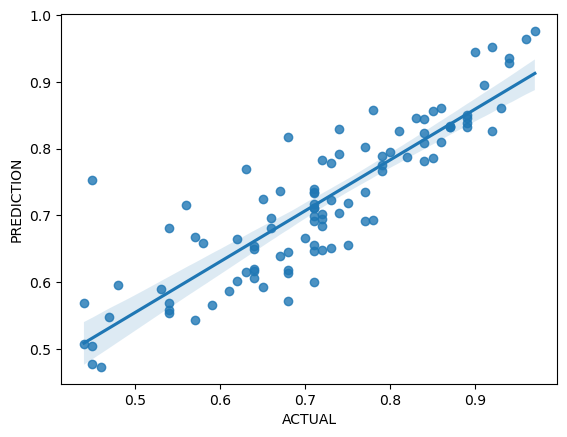

In [46]:
sns.regplot(data=OUTPUT, x='ACTUAL', y='PREDICTION')
plt.show()